In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# R or Python で comment.csv, meigara_master.csv, score.csvという３つのCSVを読み込んでください。

In [2]:
df_comment = pd.read_csv("comment.csv")

In [3]:
df_meigara = pd.read_csv("meigara_master.csv")

In [5]:
df_score = pd.read_csv("score.csv")

In [6]:
df_comment.head()

,meigara_id,toukou_id,title,created_at,user_name,text
0,1,6193,すっきりして飲みやすい,2016-10-20 11:57:54,あいうそん,おいしいです
1,1,6126,獺祭 等外２３,2016-08-08 22:20:28,富牟谷欠,獺祭 等外２３ 山田錦２３ 生酒 ２７ＢＹ ライチ様な立ち香、含み香。抜ける香りはやや甘く。...
2,1,5992,獺祭50,2016-04-26 19:24:02,季がらし,獺祭と言えば高精米、磨きが強調され、50%はその最低ランクである しかし全国の銘酒蔵もこの5...
3,1,5946,獺祭等外,2016-03-18 20:37:29,季がらし,旭酒造蔵本の売店で買った普通酒！ 山田錦は栽培時、5%以上の等外米(規格外)が出てしまい純米...
4,1,5940,スパークリング、うすにごり,2016-03-13 23:16:16,nomuyoshi,抜栓直後、瓶から上る香りは若々しく青いような香り。 上る香りはさっぱりとした果物のよう。 口...


In [7]:
df_meigara.head()

,meigara_id,rank,meigara,yomi,kuramoto,prefecture,city,detail_url
0,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931
1,2,2,醸し人九平次,かもしびとくへいじ,萬乗醸造,愛知県,名古屋市,http://www.sakeno.com/meigara/735
2,3,3,出羽桜,でわざくら,出羽桜酒造,山形県,天童市,http://www.sakeno.com/meigara/219
3,4,4,田酒,でんしゅ,西田酒造店,青森県,青森市,http://www.sakeno.com/meigara/11
4,5,5,黒龍,こくりゅう,黒龍酒造,福井県,吉田郡,http://www.sakeno.com/meigara/667


In [8]:
df_score.head()

,meigara_id,name,good_score,bad_score
0,1,味,1124,261
1,1,香り,1096,251
2,1,濃さ,979,305
3,1,価格,951,345
4,1,デザイン,976,250


In [ ]:
# 銘柄毎の good_score と bad_score の比率をプロットしてください。

In [10]:
df1 = pd.merge(df_meigara, df_score, on="meigara_id")

In [11]:
df1.head()

,meigara_id,rank,meigara,yomi,kuramoto,prefecture,city,detail_url,name,good_score,bad_score
0,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931,味,1124,261
1,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931,香り,1096,251
2,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931,濃さ,979,305
3,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931,価格,951,345
4,1,1,獺祭,だっさい,旭酒造（山口県）,山口県,岩国市,http://www.sakeno.com/meigara/931,デザイン,976,250


In [14]:
df1_sum = df1.groupby("meigara")[["good_score", "bad_score"]].sum()

In [15]:
print(df1_sum)

         good_score  bad_score
meigara                       
〆張鶴            2117        711
あさ開             738        231
あぶくま            380        171
いづみ橋            459        147
くどき上手          1189        354
たかちよ             39          5
ひこ孫            1758        167
まんさくの花          644        114
るみ子の酒           401        357
れいざん           1117        203
ロ万              169          3
一ノ蔵             977        777
一本義             202         34
一白水成            420        146
七本槍             240         62
七田              199         80
七賢              471        139
三千盛             595        247
三芳菊             391        127
三連星             190         34
上善如水           1062       1193
上喜元             879        708
不動              210         11
不老泉             527        270
丹沢山             333        110
久保田            2598       2409
乾坤一             400        130
亀泉              508        159
亀齢（広島県）         606        105
五橋              600        617
...     

In [21]:
df1_sum["good_score_ratio"] = df1_sum["good_score"] / (df1_sum["good_score"] + df1_sum["bad_score"])

In [22]:
df1_sum.head()

,good_score,bad_score,good_score_ratio
meigara,,,
〆張鶴,2117,711,0.748586
あさ開,738,231,0.761610
あぶくま,380,171,0.689655
いづみ橋,459,147,0.757426
くどき上手,1189,354,0.770577


In [23]:
df1_sum["bad_score_ratio"] = df1_sum["bad_score"] / (df1_sum["good_score"] + df1_sum["bad_score"] )

In [24]:
df1_sum.head()

,good_score,bad_score,good_score_ratio,bad_score_ratio
meigara,,,,
〆張鶴,2117,711,0.748586,0.251414
あさ開,738,231,0.761610,0.238390
あぶくま,380,171,0.689655,0.310345
いづみ橋,459,147,0.757426,0.242574
くどき上手,1189,354,0.770577,0.229423


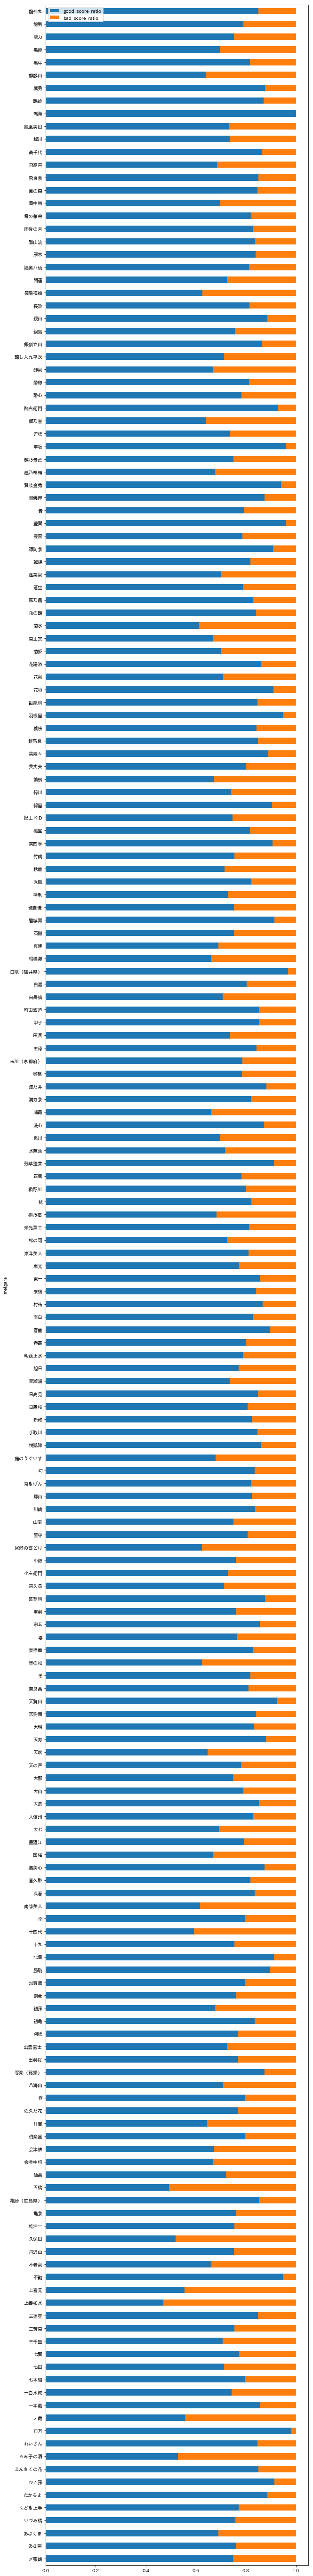

In [25]:
# 棒グラフを積み上げにする(横＝barh)
# https://ja.stackoverflow.com/questions/33034/pandas%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%83%95%E3%83%AC%E3%83%BC%E3%83%A0%E3%81%8B%E3%82%89%E7%A9%8D%E3%81%BF%E4%B8%8A%E3%81%92%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95%E3%82%92%E4%BD%9C%E3%82%8A%E3%81%9F%E3%81%84
df1_sum[["good_score_ratio", "bad_score_ratio"]].plot(kind='barh',stacked=True, figsize=(10,100))

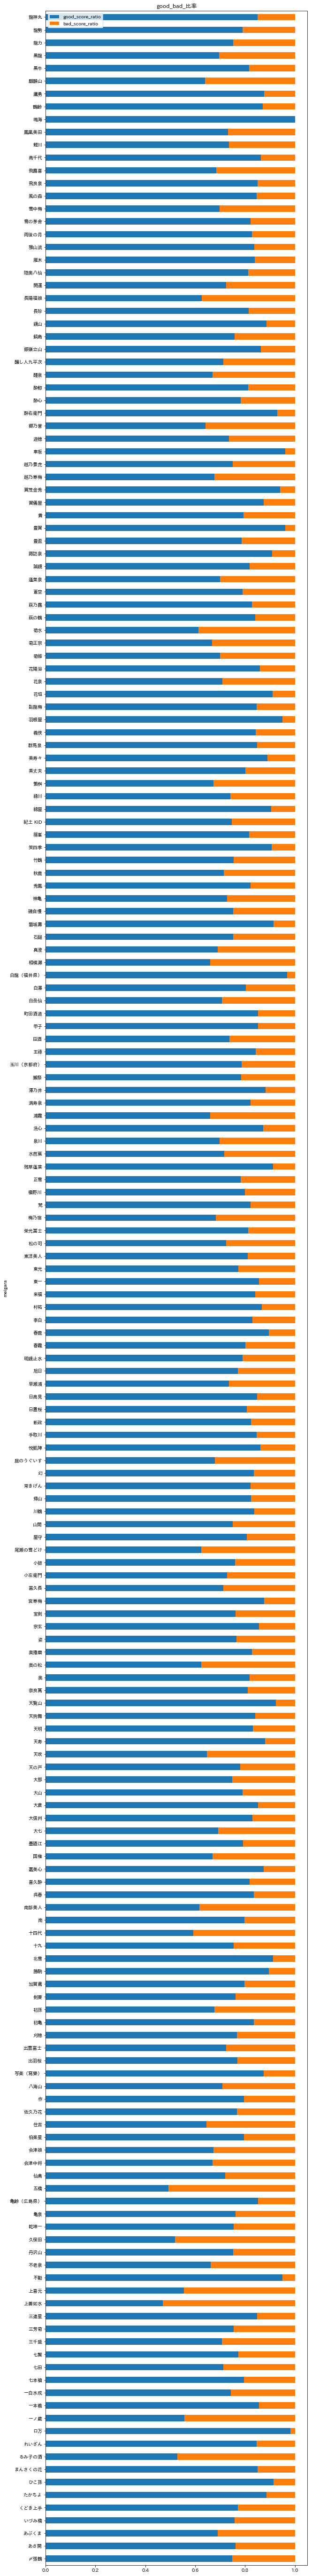

In [26]:
df1_sum[["good_score_ratio", "bad_score_ratio"]].plot(kind='barh',stacked=True, title="good_bad_比率", figsize=(10,100))